In [8]:
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Come up with non-dummy values

Come up with the maximum number of cars that could fit into each region if traffic is back-to-back.

https://www.google.com/maps/@40.2990435,-111.7249494,257m/data=!3m1!1e3?entry=ttu<br>
Northbound ramp (east side)<br>

In [1]:
# Car
# https://www.mathworks.com/help/driving/ref/sedan.html

sedan_feet = 15.9

In [2]:
# On-ramp
# Distance between meter and end of merge of two roads into on-ramp
road_pixels = (85**2 + 625**2)**(1/2)
scale_pixels = 115
scale_feet = 100

road_feet = road_pixels / scale_pixels * scale_feet
print("onramp feet:", round(road_feet))

num_lanes = 1
num_cars = road_feet * num_lanes / sedan_feet

print("number of cars:", round(num_cars))

onramp feet: 548
number of cars: 34


In [10]:
# Rate at which cars enter queue region
FEET_PER_MILE = 5280
mph = 30
ftph = FEET_PER_MILE * mph
ftpmin = ftph / 60

seconds_between_cars = 4
min_per_car = minutes_between_cars = seconds_between_cars / 60
feet_per_car = feet_between_cars = ftpmin / minutes_between_cars
# feet per min / cars per min
cars_per_min = 1 / min_per_car

num_lanes = 1
total_cars_per_min = num_lanes * cars_per_min

print("cars per minute into queue region:", total_cars_per_min)

cars per minute into queue region: 15.0


In [67]:
# Merge region
# Distance from beginning of dotted line to end of transition from two lanes to one
road_pixels = 1135
scale_pixels = 125
scale_feet = 50

merge_feet = road_pixels / scale_pixels * scale_feet
print("merge feet:", round(merge_feet))

num_lanes = 1.5
num_cars = merge_feet * num_lanes / sedan_feet

print("number of cars:", round(num_cars))

merge feet: 454
number of cars: 43


In [3]:
# Input region
# Distance from where on-ramp line meets freeway line to beginning of dotted line
road_pixels = 700
scale_pixels = 105
scale_feet = 50

road_feet = road_pixels / scale_pixels * scale_feet
print("input feet:", round(road_feet))

num_lanes = 1
num_cars = road_feet * num_lanes / sedan_feet

print("number of cars:", round(num_cars))

input feet: 333
number of cars: 21


In [6]:
# Rate at which cars enter input region
FEET_PER_MILE = 5280
mph = 70
ftph = FEET_PER_MILE * mph
ftpmin = ftph / 60

seconds_between_cars = 4
min_per_car = minutes_between_cars = seconds_between_cars / 60
feet_per_car = feet_between_cars = ftpmin / minutes_between_cars
# feet per min / cars per min
cars_per_min = 1 / min_per_car

num_lanes = 1
total_cars_per_min = num_lanes * cars_per_min

print("cars per minute into input region:", total_cars_per_min)

cars per minute into input region: 15.0


# PMP plots

In [94]:
labels = (f"I$\\bf{{n}}$put", f"$\\bf{{M}}$erge", f"$\\bf{{Q}}$ueue", f"Control", f"$\\bf{{L}}$eaving")

def get_arrs(name):
  arrs = na, ma, qa, ua, la = list(map(lambda i: 
    np.genfromtxt(os.path.join(name, f'{i}.txt'), delimiter=',').T,
    range(1, len(labels) + 1)
  ))

  return arrs

dpi = 512
height = 3
width = 3.75

# TODO

- Discuss in text: I don't think the sigmoid term makes dimensional sense
- Sensible starting quantities and rates
- Try piecewise term in $m'$

### Original $m'$ term

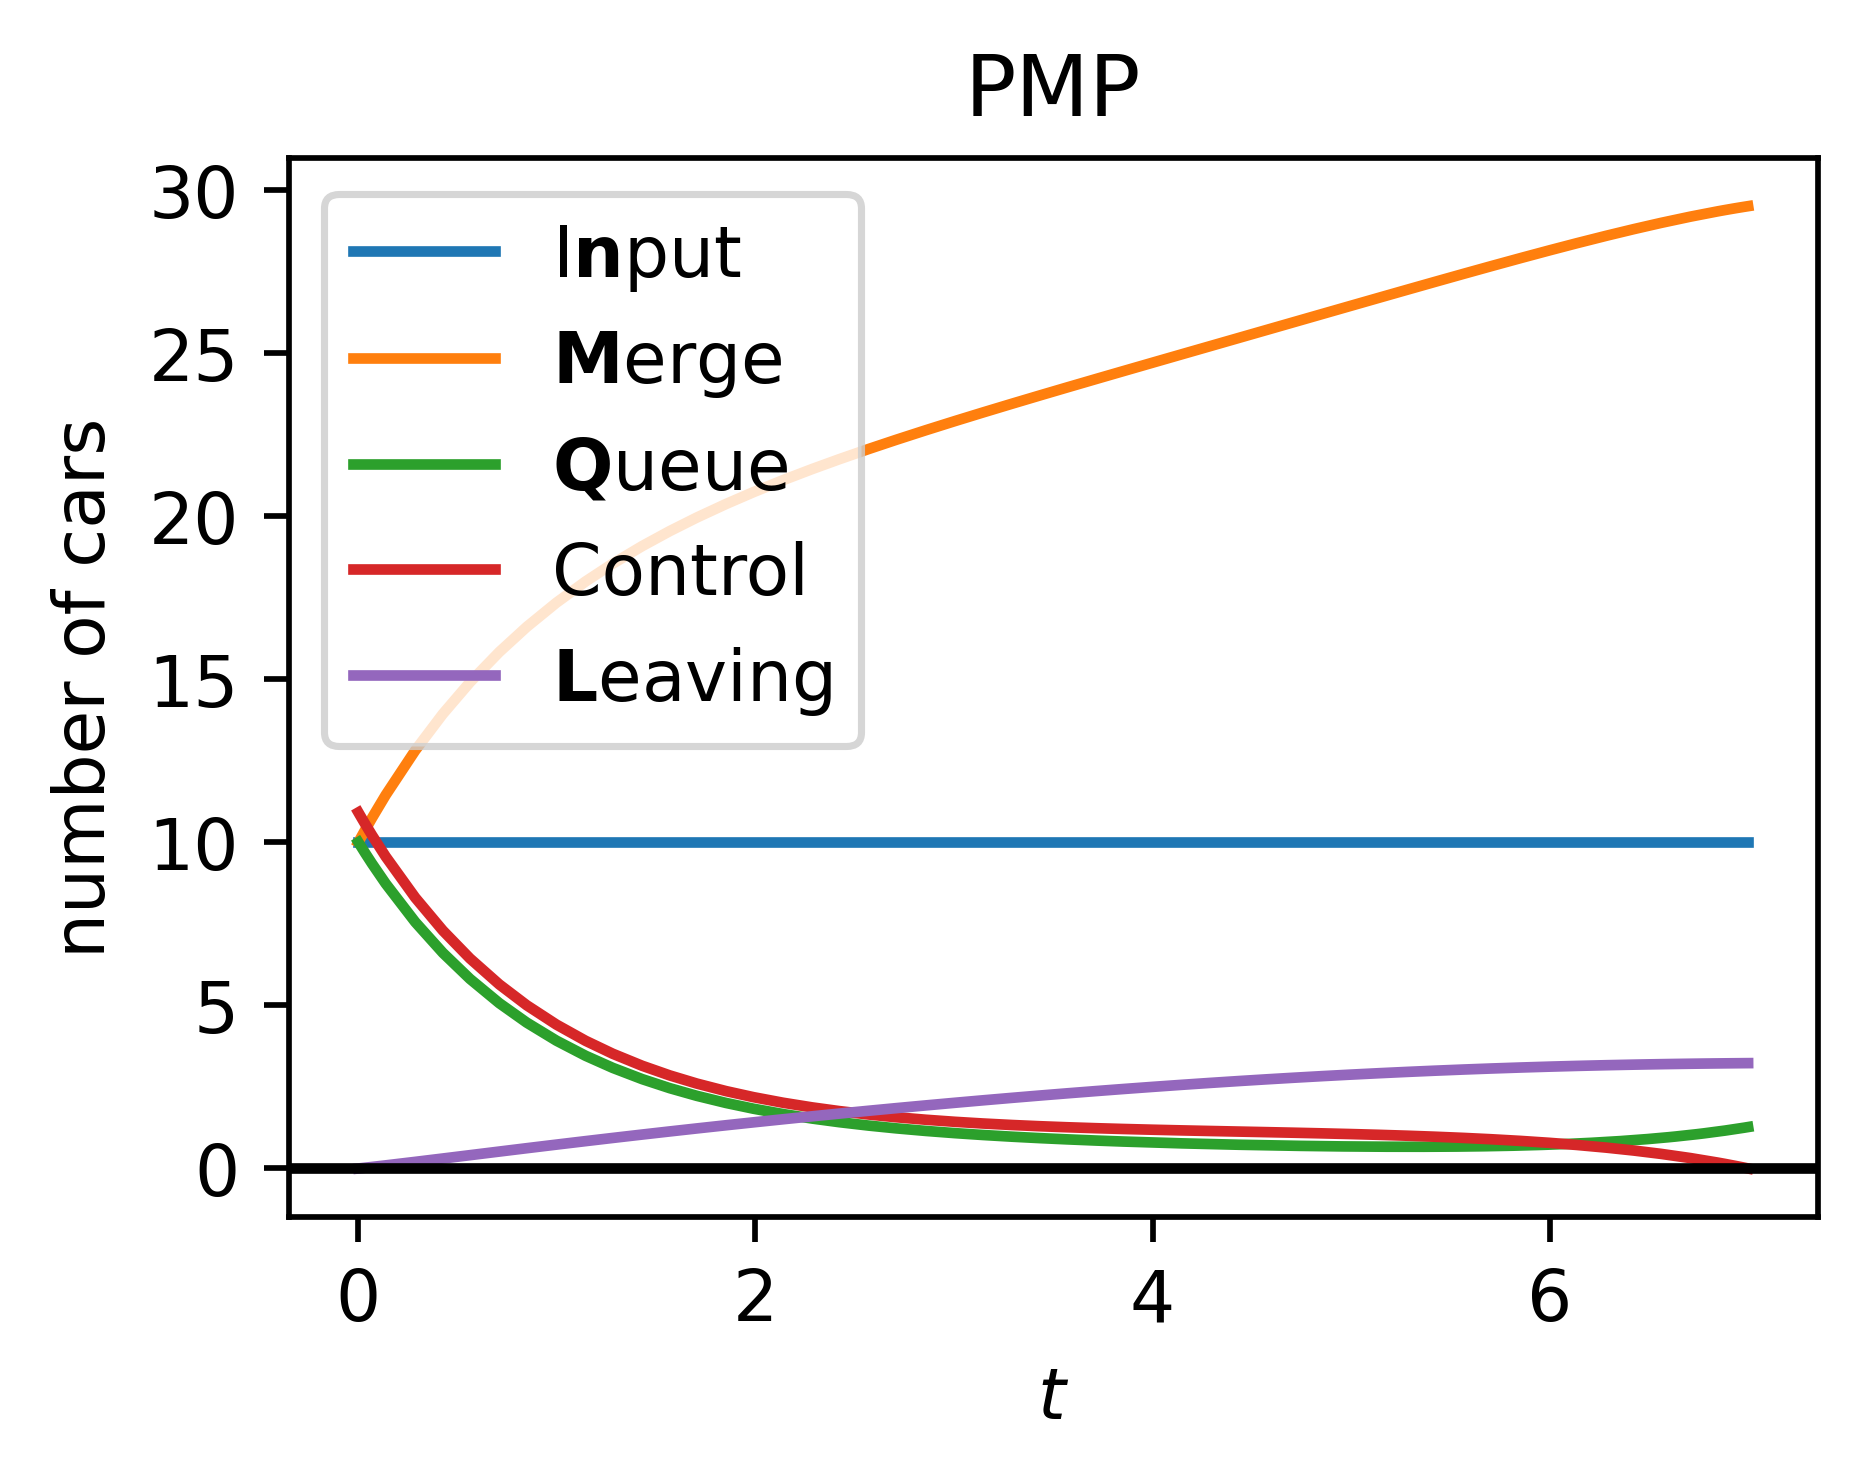

In [96]:
name = 'evolution-m-quadratic-in-m'
title = 'PMP'

arrs = na, ma, qa, ua, la = get_arrs(name)

fig, ax = plt.subplots(1, 1, figsize=(width, height), dpi=dpi)

for (ts, arr), label in zip(arrs, labels):
  ax.plot(ts, arr, label=f"{label}")

plt.axhline(0, color="black")

ax.set_xlabel("$t$")
ax.set_ylabel("number of cars")
ax.legend()
ax.set_title(title)
fig.tight_layout()
fig.show()

fig.savefig(os.path.join(name, f"PMP-plot-{name}.pdf"), format='pdf')

### Comparison of evolution terms

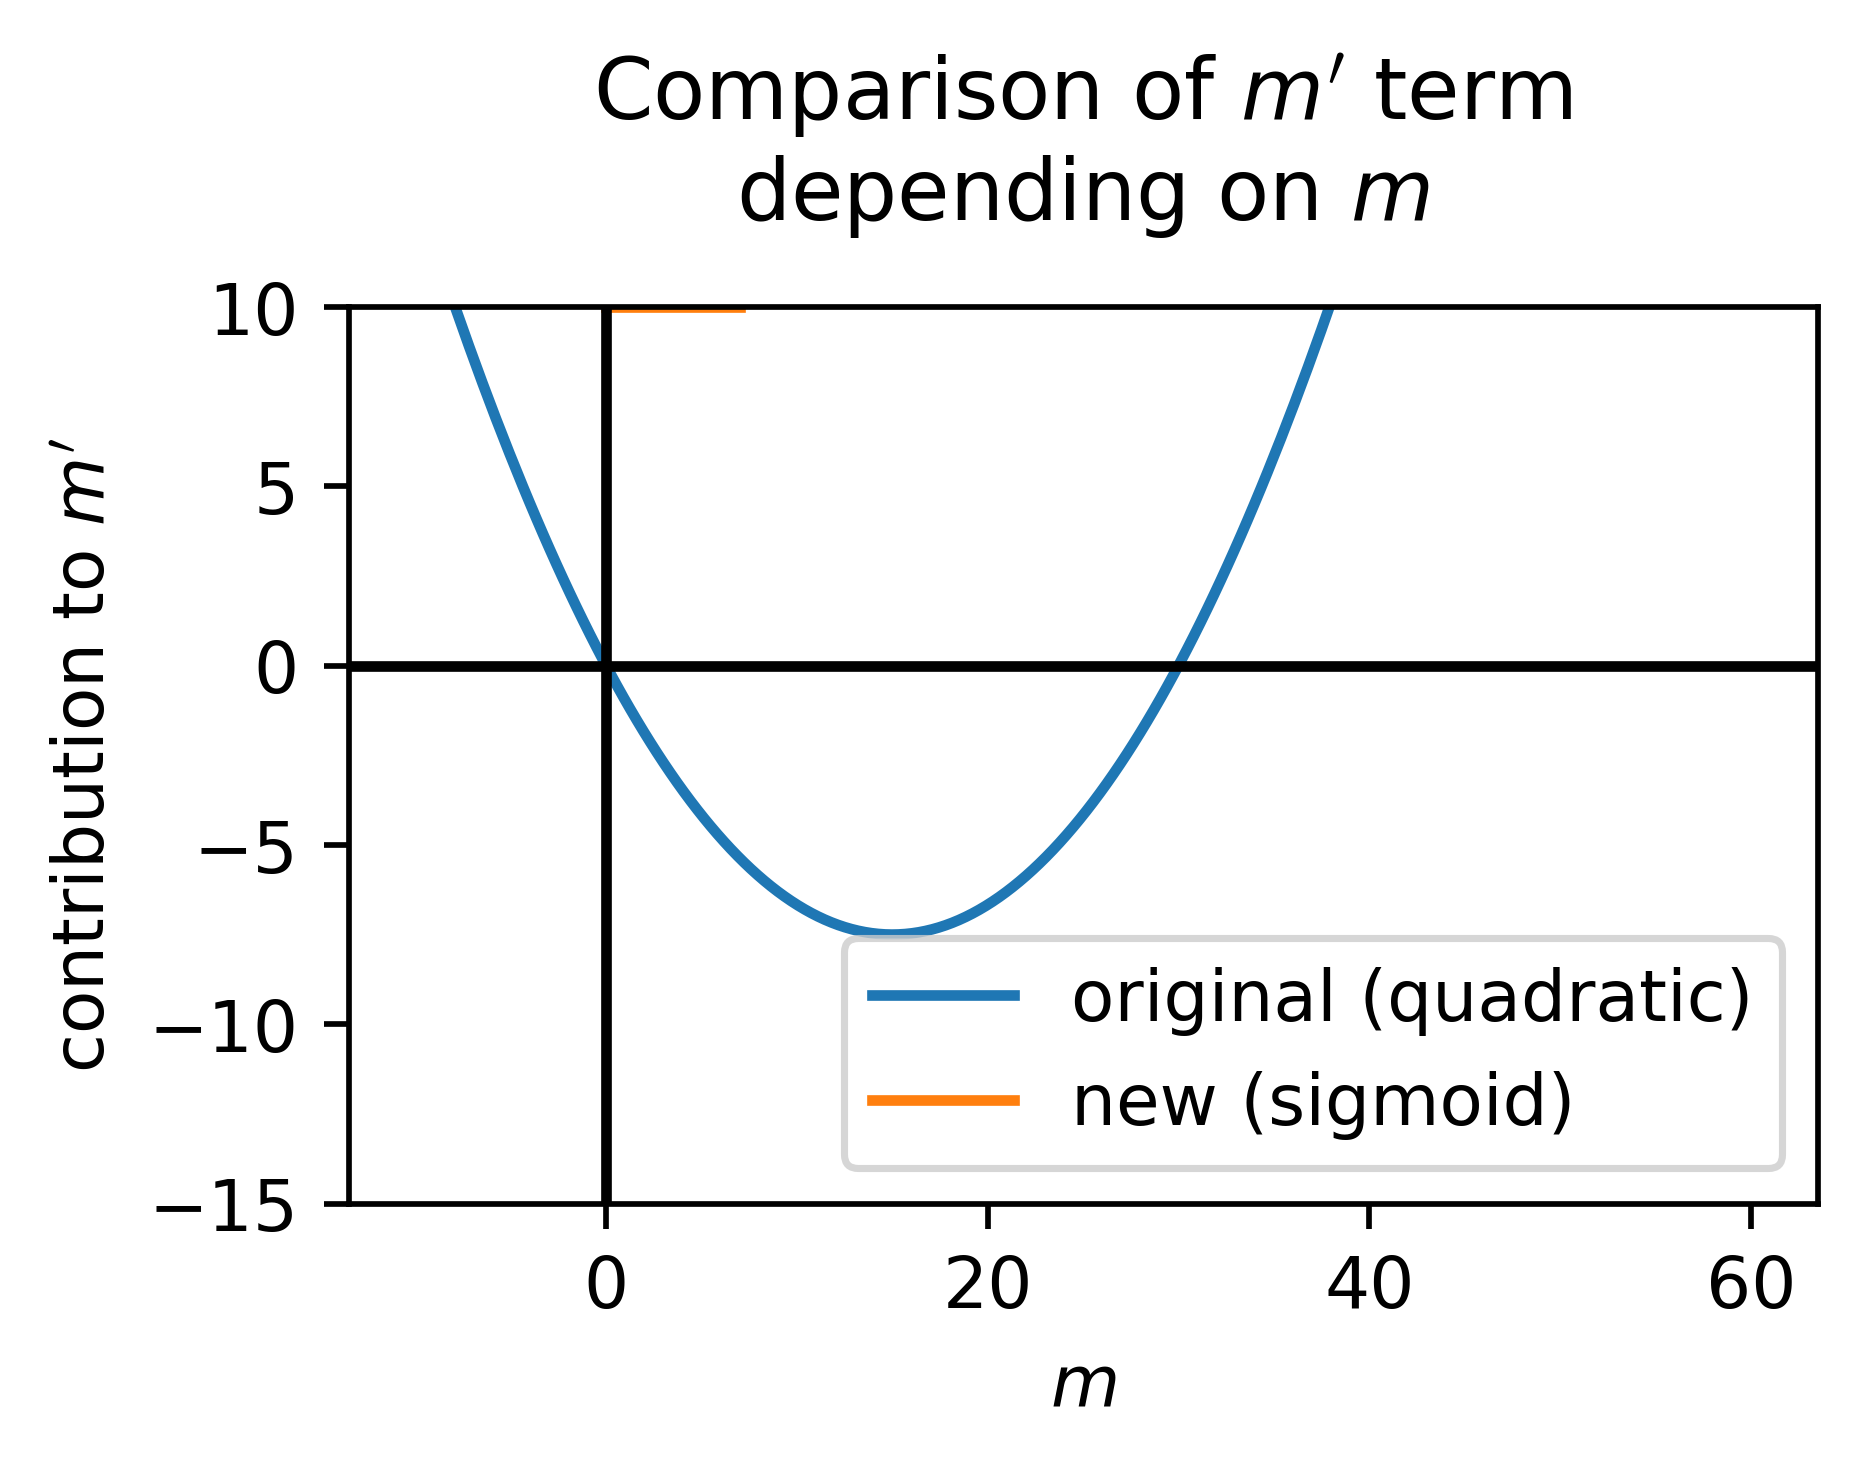

In [97]:
name = 'new-m-transition'
title = "Comparison of $m'$ term\ndepending on $m$"

capacity = 30

f = lambda x: - x * (1 - x / capacity)
old_evolution = np.array([
  xls := np.linspace(-10, 60, 200),
  f(xls)
])

new_evolution = np.genfromtxt(os.path.join(name, '1.txt'), delimiter=',').T

fig, ax = plt.subplots(1, 1, figsize=(width, height), dpi=512)

ax.plot(*old_evolution, label="original (quadratic)")
ax.plot(*new_evolution, label="new (sigmoid)")

plt.axhline(0, color="black")
plt.axvline(0, color="black")

ax.set_xlabel("$m$")
ax.set_ylabel("contribution to $m'$")
ax.set_ylim(-15, 10)
ax.legend()
ax.set_title(title, y=1.05)
fig.tight_layout()
fig.show()

fig.savefig(os.path.join(name, f"plot-evolution-terms-comparison.pdf"), format='pdf')

### New (sigmoid) $m'$ evolution term

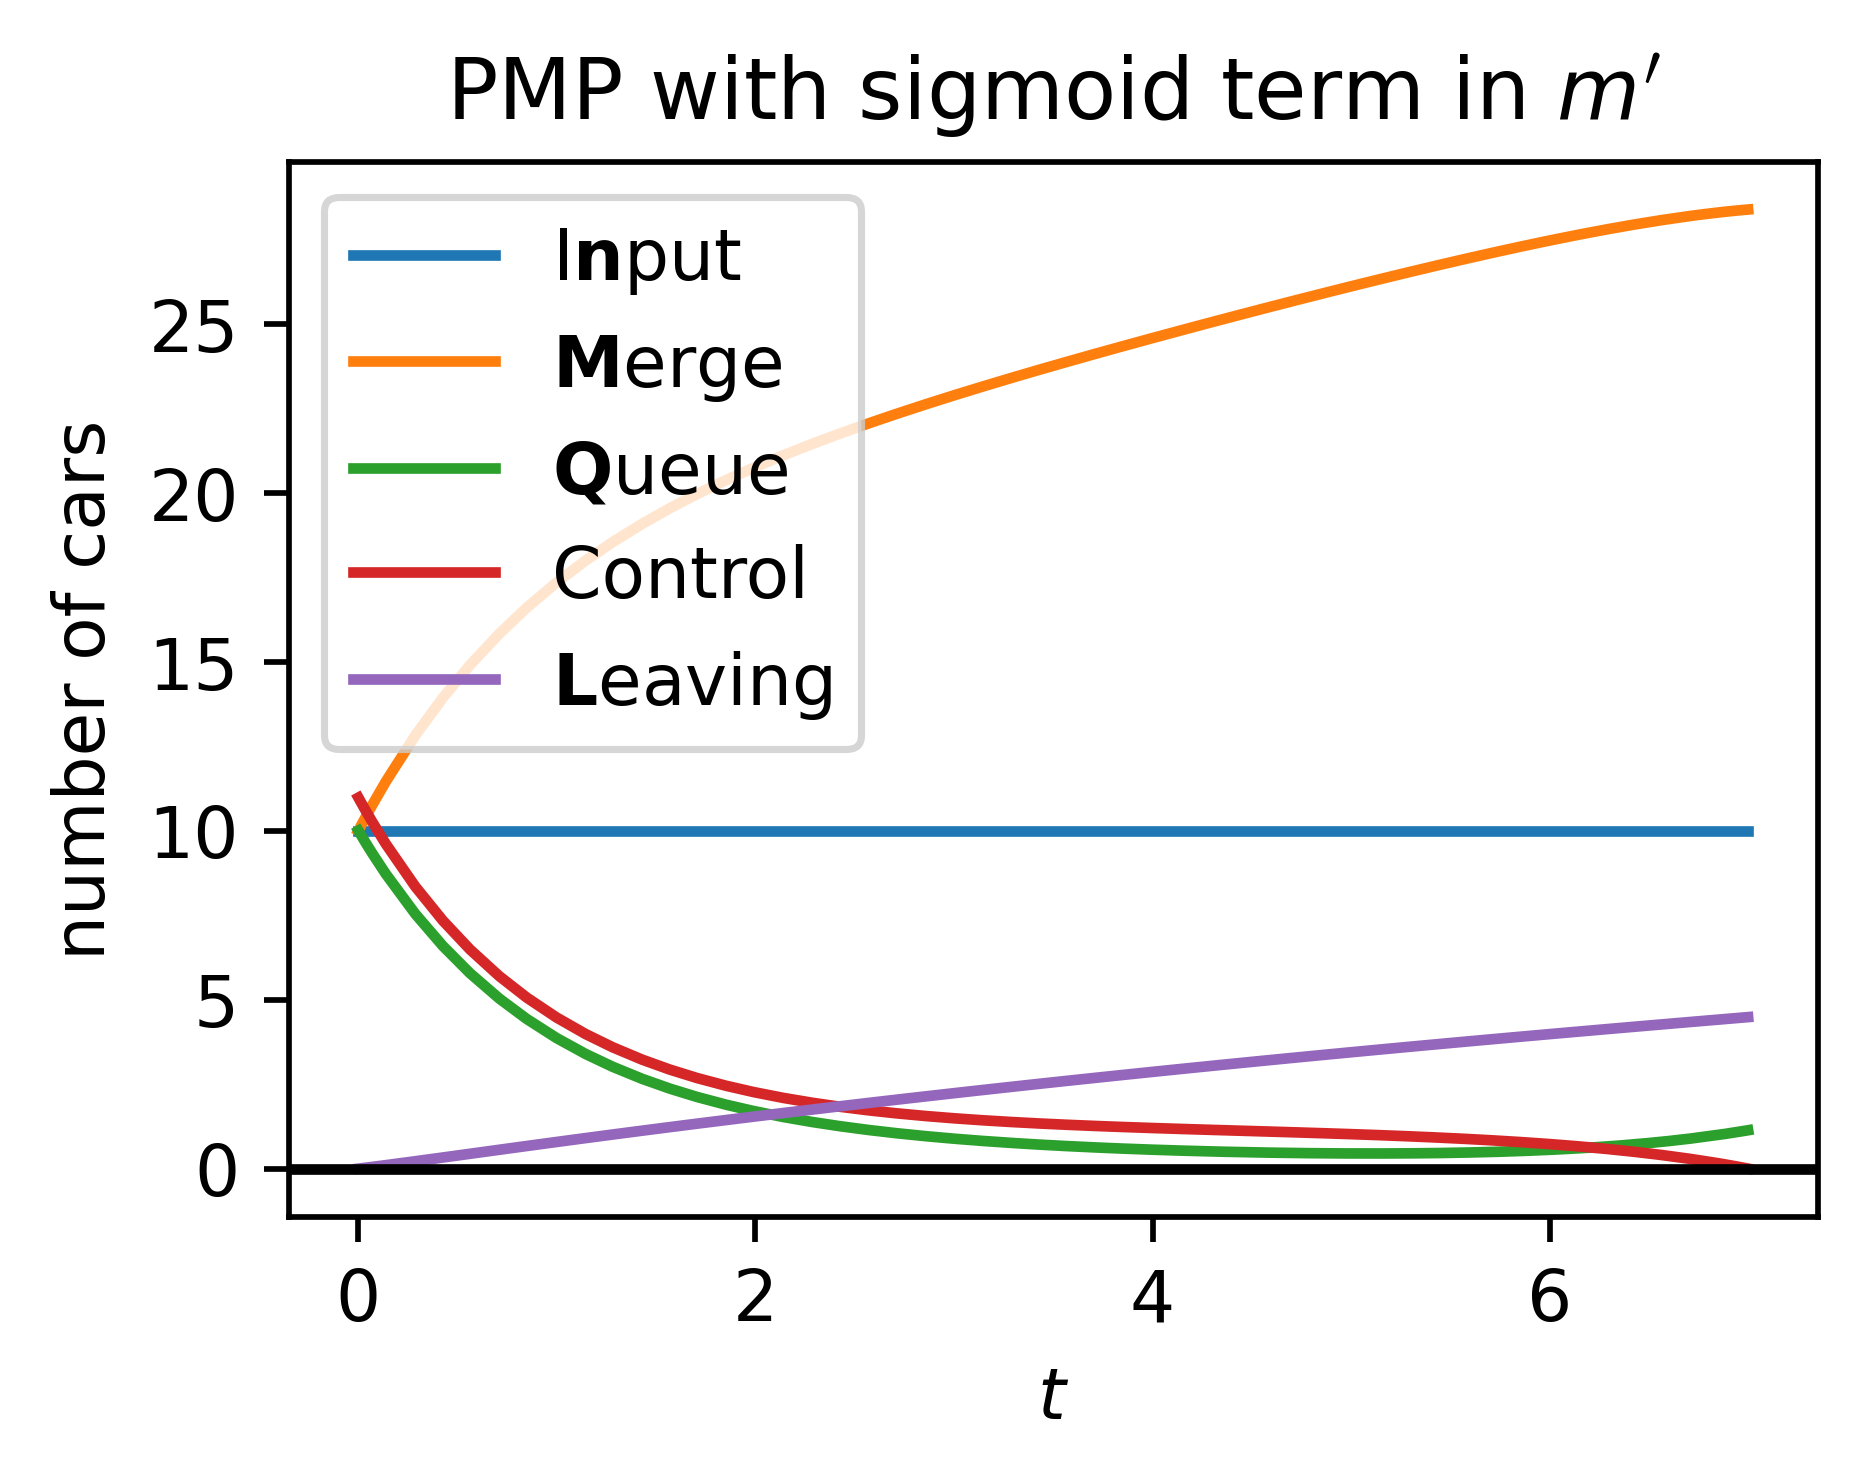

In [98]:
name = 'evolution-m-sigmoids'
title = "PMP with sigmoid term in $m'$"

arrs = na, ma, qa, ua, la = get_arrs(name)

fig, ax = plt.subplots(1, 1, figsize=(width, height), dpi=dpi)

for (ts, arr), label in zip(arrs, labels):
  ax.plot(ts, arr, label=f"{label}")

plt.axhline(0, color="black")

ax.set_xlabel("$t$")
ax.set_ylabel("number of cars")
ax.legend()
ax.set_title(title)
fig.tight_layout()
fig.show()

fig.savefig(os.path.join(name, f"PMP-plot-{name}.pdf"), format='pdf')

### Solution comparison

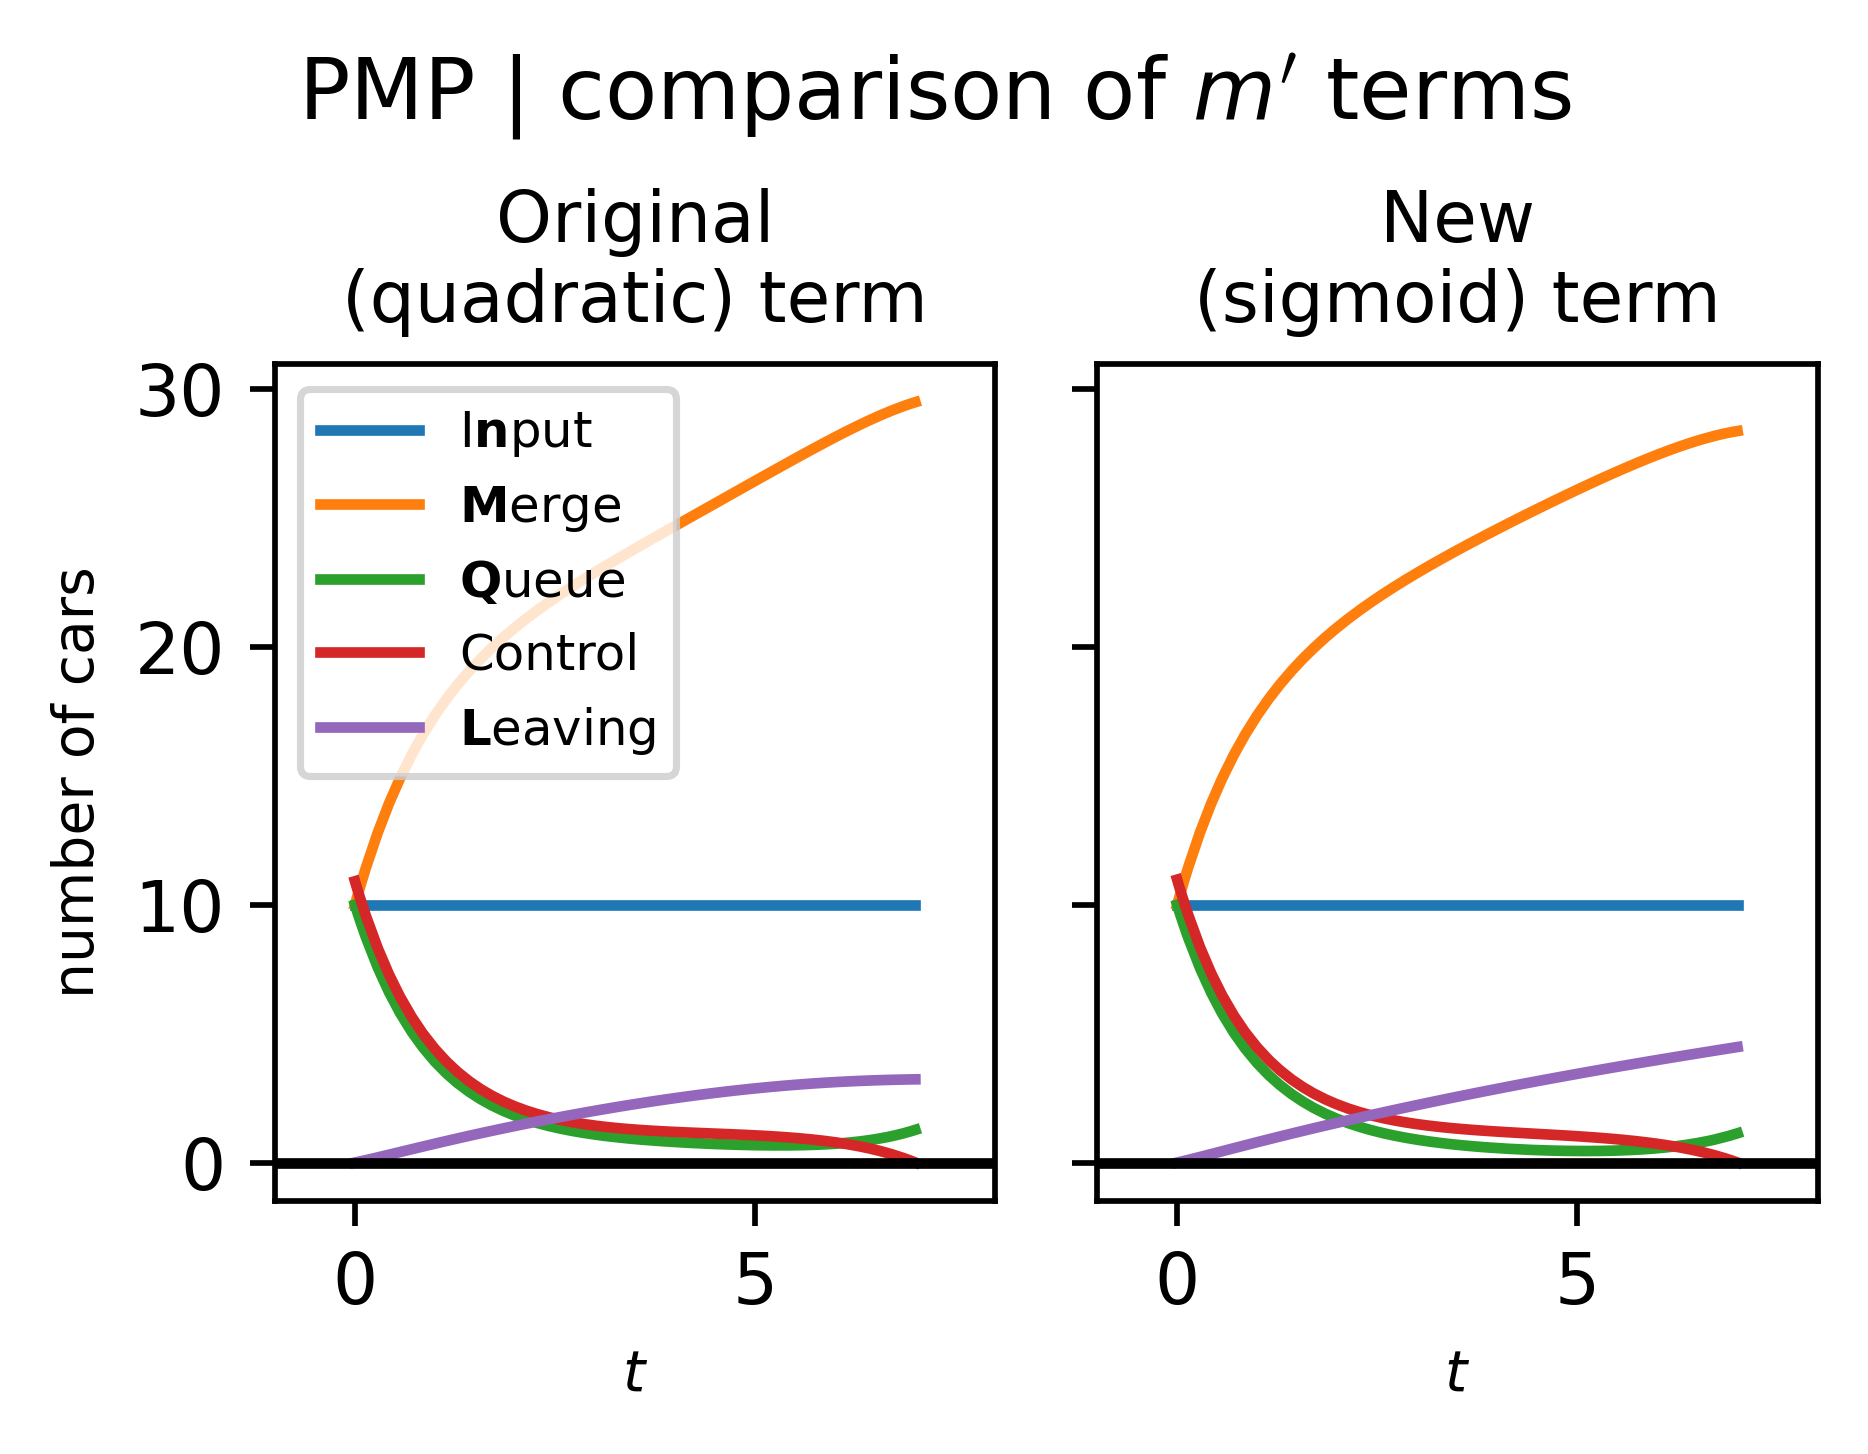

In [99]:
ax_fontsize = 10
label_fontsize = 8

fig, axs = plt.subplots(1, 2, figsize=(width, height), dpi=dpi, sharey=True)
title = "PMP | comparison of $m'$ terms"

name = 'evolution-m-quadratic-in-m'
subtitle = "Original\n(quadratic) term"

arrs = na, ma, qa, ua, la = get_arrs(name)

ax = axs[0]
for (ts, arr), label in zip(arrs, labels):
  ax.plot(ts, arr, label=f"{label}")

tspan = tmin, tmax = ts.min() - 1, ts.max() + 1
ax.hlines(0, *tspan, color="black")
ax.set_xlim(*tspan)

ax.set_xlabel("$t$", fontsize=label_fontsize)
ax.set_ylabel("number of cars", fontsize=label_fontsize)

ax.legend(loc="upper left", fontsize=7)
ax.set_title(subtitle, fontsize=ax_fontsize)


name = 'evolution-m-sigmoids'
subtitle = "New\n(sigmoid) term"

arrs = na, ma, qa, ua, la = get_arrs(name)

ax = axs[1]
for (ts, arr), label in zip(arrs, labels):
  ax.plot(ts, arr, label=f"${label}$")

tspan = tmin, tmax = ts.min() - 1, ts.max() + 1
ax.hlines(0, *tspan, color="black")
ax.set_xlim(*tspan)

ax.set_xlabel("$t$", fontsize=label_fontsize)
ax.set_title(subtitle, fontsize=ax_fontsize)

fig.suptitle(title, y=0.93)
fig.tight_layout()
fig.show()

fig.savefig(os.path.join(name, f"PMP-plot-solution-comparison.pdf"), format='pdf')

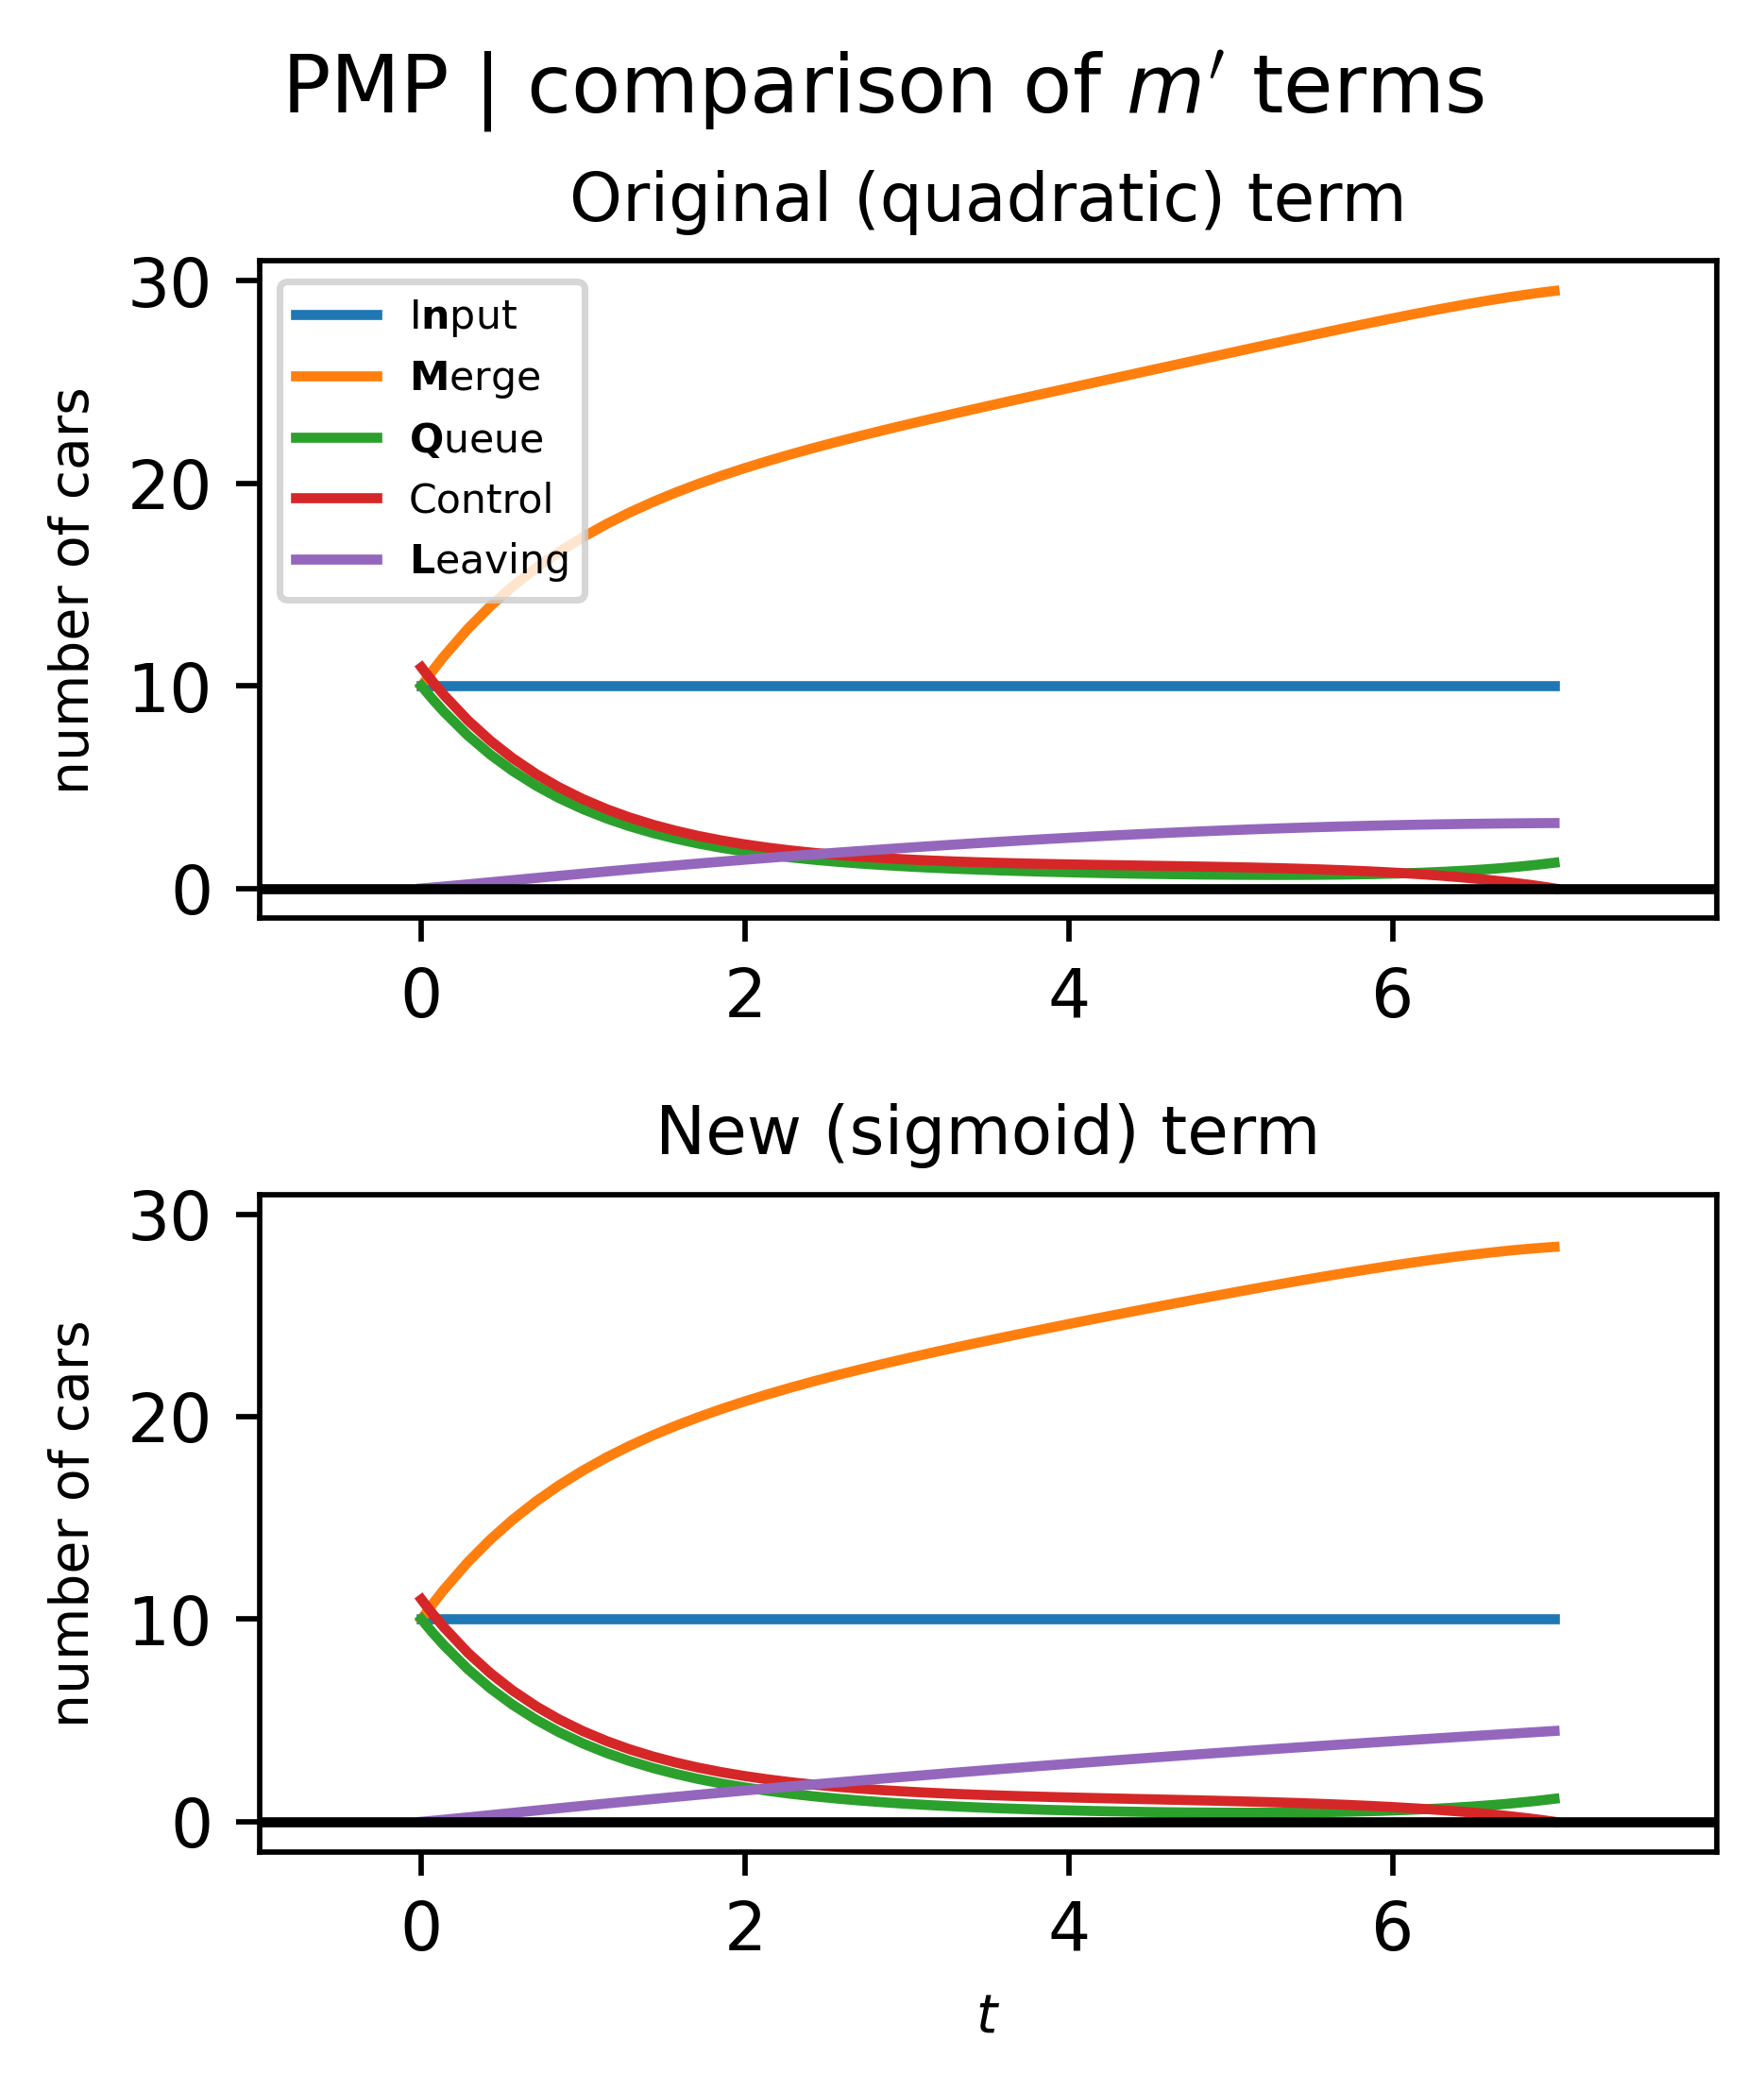

In [102]:
ax_fontsize = 10
label_fontsize = 8

fig, axs = plt.subplots(2, 1, figsize=(width, height * 1.5), dpi=dpi, sharey=True)
title = "PMP | comparison of $m'$ terms"

name = 'evolution-m-quadratic-in-m'
subtitle = "Original (quadratic) term"

arrs = na, ma, qa, ua, la = get_arrs(name)

ax = axs[0]
for (ts, arr), label in zip(arrs, labels):
  ax.plot(ts, arr, label=f"{label}")

tspan = tmin, tmax = ts.min() - 1, ts.max() + 1
ax.hlines(0, *tspan, color="black")
ax.set_xlim(*tspan)

ax.set_ylabel("number of cars", fontsize=label_fontsize)

ax.legend(loc="upper left", fontsize=6)
ax.set_title(subtitle, fontsize=ax_fontsize)


name = 'evolution-m-sigmoids'
subtitle = "New (sigmoid) term"

arrs = na, ma, qa, ua, la = get_arrs(name)

ax = axs[1]
for (ts, arr), label in zip(arrs, labels):
  ax.plot(ts, arr, label=f"{label}")

tspan = tmin, tmax = ts.min() - 1, ts.max() + 1
ax.hlines(0, *tspan, color="black")
ax.set_xlim(*tspan)

ax.set_xlabel("$t$", fontsize=label_fontsize)
ax.set_ylabel("number of cars", fontsize=label_fontsize)
ax.set_title(subtitle, fontsize=ax_fontsize)

fig.suptitle(title, y=0.95)
fig.tight_layout()
fig.show()

fig.savefig(os.path.join(name, f"PMP-plot-solution-comparison.pdf"), format='pdf')